In [ ]:
''' what we doin here buh?? '''

In [1]:
import pandas as pd

In [6]:
cb_raw = pd.read_csv('/Users/lincoln.harris/Desktop/cerebra_benchmarking/cerebra_benchmarking_laud_vcf_100.csv')
cb_raw = pd.DataFrame(cb_raw.cerebra)
cb_raw

,cerebra
0,0:05
1,1:02
2,NaN
3,NaN
4,NaN
5,1:06
6,1:37
7,NaN
8,2:15
9,NaN


In [7]:
# convert to minutes (w/decimal)
for i in range(0, len(cb_raw.cerebra)):
    val = cb_raw.cerebra.iloc[i]
    if not pd.isnull(val):
        mins = int(val.split(':')[0])
        secs = int(val.split(':')[1])
        toAdd = secs / 60
        frac = mins + toAdd
        
        cb_raw.cerebra.iloc[i] = frac

In [8]:
# sanity check
26 / 60 

0.43333333333333335

In [9]:
# now add in the 10:26 to fire up the genome trees
toAdd = 10.4333333

cb_raw.cerebra = cb_raw.cerebra + toAdd
cb_raw # nice

,cerebra
0,10.5167
1,11.4667
2,NaN
3,NaN
4,NaN
5,11.5333
6,12.05
7,NaN
8,12.6833
9,NaN


In [10]:
cb_raw = cb_raw.rename(columns={'cerebra':'minutes_elapsed'})
cb_raw['method'] = 'cerebra'
cb_raw['file_number'] = 0
cb_raw

,minutes_elapsed,method,file_number
0,10.5167,cerebra,0
1,11.4667,cerebra,0
2,NaN,cerebra,0
3,NaN,cerebra,0
4,NaN,cerebra,0
5,11.5333,cerebra,0
6,12.05,cerebra,0
7,NaN,cerebra,0
8,12.6833,cerebra,0
9,NaN,cerebra,0


In [11]:
# fill in file_number...theres gotta be an easier way of doing this
    # ideally i could exclude this column and just tell seaborn to 
    # plot the dataframe index as the y-axis
    
for i in range(0, len(cb_raw.file_number)):
    cb_raw.file_number.iloc[i] = i + 1

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
# now plot
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x='minutes_elapsed', y='file_number', data=cb_raw)
ax.set(xlim=(0, 35))

[(0, 35)]

In [57]:
# maybe i want to add a 'zero' value to my cerebra times
cb_raw = cb_raw.append({'minutes_elapsed' : 0.0, 'method' : 'cerebra', 'file_number' : 0}, ignore_index=True)

In [58]:
cb_raw

,minutes_elapsed,method,file_number,size,_size
0,10.5167,cerebra,1,1.0M,1.00
1,11.4667,cerebra,2,3.4M,3.40
2,NaN,cerebra,3,4.3M,4.30
3,NaN,cerebra,4,509K,5.09
4,NaN,cerebra,5,2.5M,2.50
5,11.5333,cerebra,6,2.4M,2.40
6,12.05,cerebra,7,4.0M,4.00
7,NaN,cerebra,8,2.8M,2.80
8,12.6833,cerebra,9,1.8M,1.80
9,NaN,cerebra,10,14M,14.00


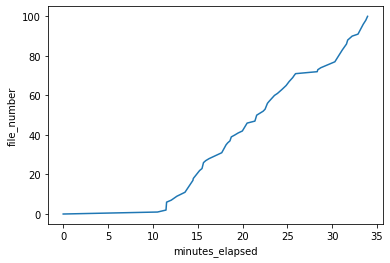

In [59]:
# sweet, this looks better
ax = sns.lineplot(x='minutes_elapsed', y='file_number', data=cb_raw)

In [16]:
#/////////////////////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////////////////////

In [19]:
# what if we wanted to get Mb processed? 
! ls -lha /Users/lincoln.harris/code/cerebra-benchmarking/scratch/ > tmp.csv

In [23]:
ls_out_df = pd.read_csv('tmp.csv', delim_whitespace=True, names=['permissions', 'foo', 'owner', 'bar', 'size', 'month', 'day', 'time', 'name'])
ls_out_df

,permissions,foo,owner,bar,size,month,day,time,name
0,total,1954776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,drwxr-xr-x,253,lincoln.harris,staff,7.9K,Jun,16.0,16:31,.
2,drwxr-xr-x,25,lincoln.harris,staff,800B,Jun,16.0,16:29,..
3,-rw-r--r--,1,lincoln.harris,staff,1.0M,Oct,25.0,2019,A10_1001000407.vcf
4,-rw-r--r--,1,lincoln.harris,staff,3.4M,Oct,25.0,2019,A10_1001000408.vcf
5,-rw-r--r--,1,lincoln.harris,staff,4.3M,Oct,25.0,2019,A10_1001000412.vcf
6,-rw-r--r--,1,lincoln.harris,staff,509K,Oct,25.0,2019,A10_B000863.vcf
7,-rw-r--r--,1,lincoln.harris,staff,2.5M,Oct,25.0,2019,A10_B001470.vcf
8,-rw-r--r--,1,lincoln.harris,staff,2.4M,Oct,25.0,2019,A10_B001474.vcf
9,-rw-r--r--,1,lincoln.harris,staff,4.0M,Oct,25.0,2019,A10_B001545.vcf


In [28]:
# get rid of these wierd rows
ls_out_df = ls_out_df[['size', 'name']]
ls_out_df = ls_out_df.drop([0])
ls_out_df = ls_out_df.drop([1])
ls_out_df = ls_out_df.drop([2])
ls_out_df

,size,name
3,1.0M,A10_1001000407.vcf
4,3.4M,A10_1001000408.vcf
5,4.3M,A10_1001000412.vcf
6,509K,A10_B000863.vcf
7,2.5M,A10_B001470.vcf
8,2.4M,A10_B001474.vcf
9,4.0M,A10_B001545.vcf
10,2.8M,A10_B001554.vcf
11,1.8M,A10_B001558.vcf
12,14M,A10_B002572.vcf


In [29]:
# reindex
ls_out_df = ls_out_df.reset_index(drop=True)
ls_out_df

,size,name
0,1.0M,A10_1001000407.vcf
1,3.4M,A10_1001000408.vcf
2,4.3M,A10_1001000412.vcf
3,509K,A10_B000863.vcf
4,2.5M,A10_B001470.vcf
5,2.4M,A10_B001474.vcf
6,4.0M,A10_B001545.vcf
7,2.8M,A10_B001554.vcf
8,1.8M,A10_B001558.vcf
9,14M,A10_B002572.vcf


In [30]:
# want to add in file_number
ls_out_df['file_number'] = ''

for i in range(0, len(ls_out_df.file_number)):
    ls_out_df.file_number.iloc[i] = i + 1

In [42]:
ls_out_df['size'][10]

'4.4M'

In [45]:
# how easy would it be to append to cb_raw? 
cb_raw['size'] = ''

for i in range(0,len(cb_raw.index)):
    f_number = i+1
    f_size = ls_out_df['size'][i]
    
    cb_raw['size'][i] = f_size

cb_raw

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,minutes_elapsed,method,file_number,size
0,10.5167,cerebra,1,1.0M
1,11.4667,cerebra,2,3.4M
2,NaN,cerebra,3,4.3M
3,NaN,cerebra,4,509K
4,NaN,cerebra,5,2.5M
5,11.5333,cerebra,6,2.4M
6,12.05,cerebra,7,4.0M
7,NaN,cerebra,8,2.8M
8,12.6833,cerebra,9,1.8M
9,NaN,cerebra,10,14M


In [52]:
# now need to convert these bitches to floats
cb_raw['_size'] = 0.0

for i in range(0,len(cb_raw.index)):
    size_str = cb_raw['size'][i]
    
    if 'M' in size_str:
        # do something
        ss = float(size_str.strip('M'))
    elif 'K' in size_str:
        # do something
        ss = float(size_str.strip('K'))
        ss = ss / 100
        
    cb_raw['_size'][i] = ss

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [53]:
cb_raw

,minutes_elapsed,method,file_number,size,_size
0,10.5167,cerebra,1,1.0M,1.00
1,11.4667,cerebra,2,3.4M,3.40
2,NaN,cerebra,3,4.3M,4.30
3,NaN,cerebra,4,509K,5.09
4,NaN,cerebra,5,2.5M,2.50
5,11.5333,cerebra,6,2.4M,2.40
6,12.05,cerebra,7,4.0M,4.00
7,NaN,cerebra,8,2.8M,2.80
8,12.6833,cerebra,9,1.8M,1.80
9,NaN,cerebra,10,14M,14.00


In [54]:
# i dont know what these guys are doing
cb_raw = cb_raw.drop([101])
cb_raw = cb_raw.drop([100])

cb_raw = cb_raw.reset_index(drop=True)
cb_raw

,minutes_elapsed,method,file_number,size,_size
0,10.5167,cerebra,1,1.0M,1.00
1,11.4667,cerebra,2,3.4M,3.40
2,NaN,cerebra,3,4.3M,4.30
3,NaN,cerebra,4,509K,5.09
4,NaN,cerebra,5,2.5M,2.50
5,11.5333,cerebra,6,2.4M,2.40
6,12.05,cerebra,7,4.0M,4.00
7,NaN,cerebra,8,2.8M,2.80
8,12.6833,cerebra,9,1.8M,1.80
9,NaN,cerebra,10,14M,14.00


In [61]:
# need to assign cummulative size
cb_raw['cum_size'] = 0.0

cum_size = 0.0
for i in range(0,len(cb_raw.index)):
    curr_size = cb_raw['_size'][i]
    cum_size = cum_size + curr_size
    cb_raw['cum_size'][i] = cum_size

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
cb_raw

,minutes_elapsed,method,file_number,size,_size,cum_size
0,10.5167,cerebra,1,1.0M,1.00,1.00
1,11.4667,cerebra,2,3.4M,3.40,4.40
2,NaN,cerebra,3,4.3M,4.30,8.70
3,NaN,cerebra,4,509K,5.09,13.79
4,NaN,cerebra,5,2.5M,2.50,16.29
5,11.5333,cerebra,6,2.4M,2.40,18.69
6,12.05,cerebra,7,4.0M,4.00,22.69
7,NaN,cerebra,8,2.8M,2.80,25.49
8,12.6833,cerebra,9,1.8M,1.80,27.29
9,NaN,cerebra,10,14M,14.00,41.29


In [66]:
# maybe i want to add a 'zero' value to my cerebra times
cb_raw = cb_raw.append({'minutes_elapsed':0.0, 'method':'cerebra', 'file_number':0, 'size':'0', '_size':0.0, 'cum_size':0.0}, ignore_index=True)
cb_raw

,minutes_elapsed,method,file_number,size,_size,cum_size
0,10.5167,cerebra,1,1.0M,1.00,1.00
1,11.4667,cerebra,2,3.4M,3.40,4.40
2,NaN,cerebra,3,4.3M,4.30,8.70
3,NaN,cerebra,4,509K,5.09,13.79
4,NaN,cerebra,5,2.5M,2.50,16.29
5,11.5333,cerebra,6,2.4M,2.40,18.69
6,12.05,cerebra,7,4.0M,4.00,22.69
7,NaN,cerebra,8,2.8M,2.80,25.49
8,12.6833,cerebra,9,1.8M,1.80,27.29
9,NaN,cerebra,10,14M,14.00,41.29


[Text(0, 0.5, 'Mb processed'), Text(0.5, 0, 'time elapsed (minutes)')]

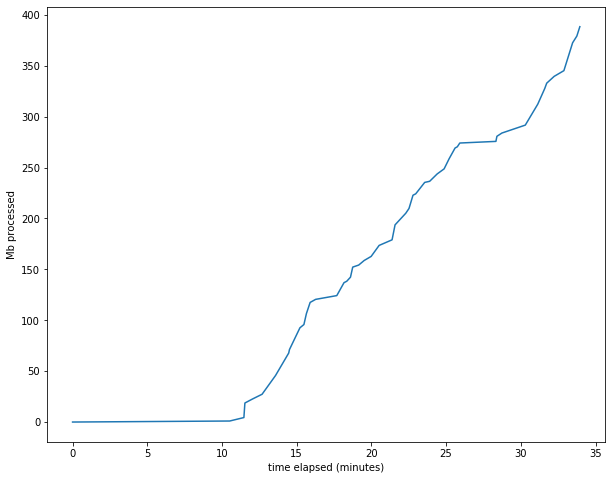

In [96]:
# sweet, this looks better
import seaborn as sns
from matplotlib.pyplot import figure

plt.figure(figsize=(10,8)) # fuck yeah
fig = sns.lineplot(x='minutes_elapsed', y='cum_size', data=cb_raw)
fig.set(xlabel='time elapsed (minutes)', ylabel='Mb processed')

In [97]:
fig.figure.savefig('/Users/lincoln.harris/Desktop/cerebra_runtime_x_megabytes.jpg')

In [81]:
#/////////////////////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////////////////////

In [ ]:
# now want to add in GiaB timecoursese